In [1]:
# install python packages
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# data processing
df = pd.read_csv("prices.csv")
print (df)

           date     value
0      8/1/2021  41659.06
1     7/31/2021  42214.15
2     7/30/2021  40005.93
3     7/29/2021  40002.53
4     7/28/2021  39405.95
...         ...       ...
4590   1/6/2009      0.00
4591   1/5/2009      0.00
4592   1/4/2009      0.00
4593   1/3/2009      0.00
4594   1/2/2009      0.00

[4595 rows x 2 columns]


In [2]:
df = df.iloc[::-1]
df = df[ df['value']>0]
df['date'] = pd.to_datetime(df['date'])
print (df)

           date       value
4003 2010-08-16      0.0769
4001 2010-08-18      0.0688
4000 2010-08-19      0.0667
3999 2010-08-20      0.0700
3998 2010-08-21      0.0664
...         ...         ...
4    2021-07-28  39405.9500
3    2021-07-29  40002.5300
2    2021-07-30  40005.9300
1    2021-07-31  42214.1500
0    2021-08-01  41659.0600

[4003 rows x 2 columns]


In [3]:
# logarithmicregression fitting
def funct(x, p1, p2):
    return p1*np.log(x) + p2

xdata = np.array([x+1 for x in range(len(df))])
ydata = np.log(df['value'])

popt, pcov = curve_fit(funct, xdata, ydata, p0=(3.0, -10))
print(popt)

[  3.00146577 -15.83713496]


In [4]:
fittedydata = funct(xdata, popt[0], popt[1])

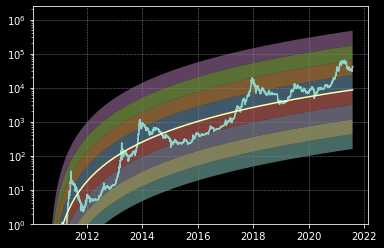

In [5]:
plt.style.use("dark_background")

plt.semilogy(df['date'], df['value'])

for i in range(-3,5):
    plt.fill_between(df['date'], np.exp(fittedydata + i -1), np.exp(fittedydata + i), alpha = 0.5)

plt.plot(df['date'], np.exp(fittedydata))

plt.ylim(bottom = 1)

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()